<a href="https://colab.research.google.com/github/Karthikeyan-ganesan86/Mscproj/blob/main/06_DISSERTATION_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LINEAR REGRESSION USING THE RBC STOCKS(ROYAL BANK OF CANADA)

## IT CAN BE SEEN THAT USING THIS STRATEGY THE RETURNS ARE WAY BETTER

In [ ]:
#!pip uninstall scikit-learn -y

#!pip install -U scikit-learn

import sklearn

sklearn.__version__

'1.3.2'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from pandas_datareader import data

def create_classification_trading_condition(df):
    df['Open-Close'] = df.Open - df.Close
    df['High-Low'] = df.High - df.Low
    df = df.dropna()
    X = df[['Open-Close', 'High-Low']]
    Y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)
    return (df, X, Y)

def create_regression_trading_condition(df):
    df['Open-Close'] = df.Open - df.Close
    df['High-Low'] = df.High - df.Low
    df['Target'] = df['Close'].shift(-1) - df['Close']
    df = df.dropna()
    X = df[['Open-Close', 'High-Low']]
    Y = df[['Target']]
    return (df, X, Y)

def create_train_split_group(X, Y, split_ratio=0.8):
    return train_test_split(X, Y, shuffle=False, train_size=split_ratio)

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
data = yf.download("RY.TO ", start="2023-01-01", end="2023-11-30")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,128.410004,128.860001,127.360001,128.029999,122.739273,4506700
2023-01-04,128.500000,130.050003,128.139999,129.169998,123.832161,3282500
2023-01-05,128.020004,129.029999,127.870003,128.789993,123.467865,2219400
2023-01-06,129.020004,130.470001,128.820007,130.429993,125.040100,3559400
2023-01-09,130.820007,131.830002,130.570007,131.399994,125.970016,3719700
...,...,...,...,...,...,...
2023-11-23,118.889999,119.849998,118.459999,118.660004,118.660004,1232500
2023-11-24,118.610001,119.449997,118.080002,118.959999,118.959999,1499400
2023-11-27,118.959999,119.000000,117.949997,118.129997,118.129997,3332500


In [ ]:
store_df = data

In [ ]:
data, X, Y = create_regression_trading_condition(data)

In [ ]:
X_train,X_test,Y_train,Y_test=create_train_split_group(X,Y,split_ratio=0.8)

In [ ]:
from sklearn import linear_model
# Fit the model
ols = linear_model.LinearRegression()
ols.fit(X_train, Y_train)
# Forecast value

# The coefficients
print('Coefficients: \n', ols.coef_)

Coefficients: 
 [[-0.03163026  0.05079614]]


In [ ]:
data['Predicted_Signal'] = ols.predict(X)
data['rbc_Returns'] = np.log(
    data['Close'] / data['Close'].shift(1))

<ipython-input-11-3d10ae7805a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted_Signal'] = ols.predict(X)
<ipython-input-11-3d10ae7805a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rbc_Returns'] = np.log(


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Target,Predicted_Signal,rbc_Returns
Date,,,,,,,,,,,
2023-01-03,128.410004,128.860001,127.360001,128.029999,122.739273,4506700,0.380005,1.500000,1.139999,-0.052543,NaN
2023-01-04,128.500000,130.050003,128.139999,129.169998,123.832161,3282500,-0.669998,1.910004,-0.380005,0.001496,0.008865
2023-01-05,128.020004,129.029999,127.870003,128.789993,123.467865,2219400,-0.769989,1.159996,1.639999,-0.033439,-0.002946
2023-01-06,129.020004,130.470001,128.820007,130.429993,125.040100,3559400,-1.409988,1.649994,0.970001,0.011694,0.012654
2023-01-09,130.820007,131.830002,130.570007,131.399994,125.970016,3719700,-0.579987,1.259995,1.500000,-0.034369,0.007409
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,119.959999,120.110001,118.839996,118.970001,118.970001,4038000,0.989998,1.270004,-0.309998,-0.083520,-0.006785
2023-11-23,118.889999,119.849998,118.459999,118.660004,118.660004,1232500,0.229996,1.389999,0.299995,-0.053386,-0.002609
2023-11-24,118.610001,119.449997,118.080002,118.959999,118.959999,1499400,-0.349998,1.369995,-0.830002,-0.036056,0.002525


In [ ]:
def calculate_return(df, split_value, symbol):
    cum_rbc_return = df[split_value:]['%s_Returns' % symbol].cumsum() * 100
    df['Strategy_Returns'] = df['%s_Returns' %
                                symbol] * df['Predicted_Signal'].shift(1)
    return cum_rbc_return

In [ ]:
def calculate_strategy_return(df, split_value, symbol):
    cum_strategy_return = df[split_value:]['Strategy_Returns'].cumsum() * 100
    return cum_strategy_return

In [ ]:
cum_rbc_return = calculate_return(
    data, split_value=len(X_train), symbol='rbc')
cum_strategy_return = calculate_strategy_return(
    data, split_value=len(X_train), symbol='rbc')

<ipython-input-13-14ffee8fddbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Strategy_Returns'] = df['%s_Returns' %


In [ ]:
def plot_shart(cum_symbol_return, cum_strategy_return, symbol):
    plt.figure(figsize=(10, 5))
    plt.plot(cum_symbol_return, label='%s Returns' % symbol)
    plt.plot(cum_strategy_return, label='Strategy Returns')
    plt.legend()
    plt.show()

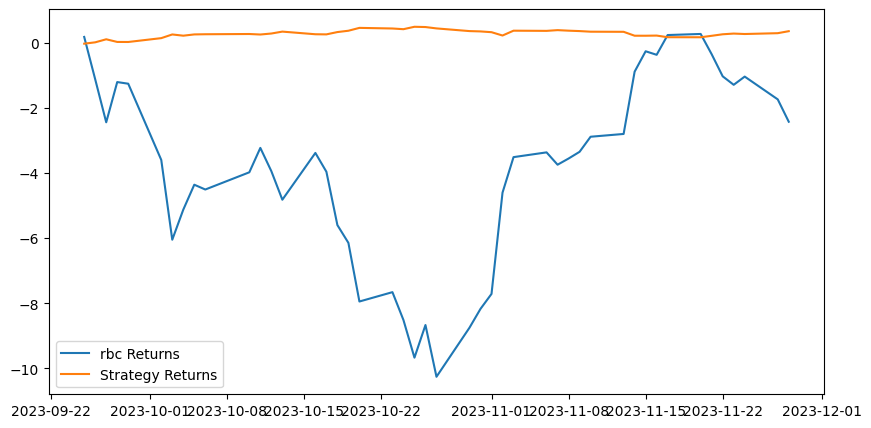

In [ ]:
plot_shart(cum_rbc_return, cum_strategy_return, symbol='rbc')

In [ ]:
def sharpe_ratio(symbol_returns, strategy_returns):
    strategy_std = strategy_returns.std()
    sharpe = (strategy_returns - symbol_returns) / strategy_std
    return sharpe.mean()

In [ ]:
print(sharpe_ratio(cum_strategy_return, cum_rbc_return))

-1.4375109189488682


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_train, ols.predict(X_train)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_train, ols.predict(X_train)))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, ols.predict(X_test)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, ols.predict(X_test)))

Mean squared error: 1.30
Variance score: 0.00
Mean squared error: 1.60
Variance score: 0.01


# RIDGE VARIANT

In [ ]:
ridge_df=store_df

In [ ]:
ridge_df, X, Y = create_regression_trading_condition(ridge_df)

In [ ]:
X_train,X_test,Y_train,Y_test=create_train_split_group(X,Y,split_ratio=0.8)

In [ ]:
from sklearn import linear_model
# Fit the model
ols = linear_model.LinearRegression()
ols.fit(X_train, Y_train)
# Forecast value

# The coefficients
print('Coefficients: \n', ols.coef_)

Coefficients: 
 [[-0.03163026  0.05079614]]


In [ ]:
from sklearn import linear_model

# Fit the model
ridge = linear_model.Ridge(alpha=10000)
ridge.fit(X_train, Y_train)

# The coefficients
print('Coefficients: \n', ridge.coef_)

Coefficients: 
 [[-0.00033879  0.00027873]]


In [ ]:
ridge_df['Predicted_Signal'] = ridge.predict(X)
ridge_df['rbc_Returns'] = np.log(
    ridge_df['Close'] / ridge_df['Close'].shift(1))

<ipython-input-26-2e0dc2374a33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ridge_df['Predicted_Signal'] = ridge.predict(X)
<ipython-input-26-2e0dc2374a33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ridge_df['rbc_Returns'] = np.log(


In [ ]:
ridge_df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Target,Predicted_Signal,rbc_Returns
Date,,,,,,,,,,,
2023-01-03,128.410004,128.860001,127.360001,128.029999,122.739273,4506700,0.380005,1.500000,1.139999,-0.041710,NaN
2023-01-04,128.500000,130.050003,128.139999,129.169998,123.832161,3282500,-0.669998,1.910004,-0.380005,-0.041240,0.008865
2023-01-05,128.020004,129.029999,127.870003,128.789993,123.467865,2219400,-0.769989,1.159996,1.639999,-0.041415,-0.002946
2023-01-06,129.020004,130.470001,128.820007,130.429993,125.040100,3559400,-1.409988,1.649994,0.970001,-0.041062,0.012654
2023-01-09,130.820007,131.830002,130.570007,131.399994,125.970016,3719700,-0.579987,1.259995,1.500000,-0.041452,0.007409
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,119.959999,120.110001,118.839996,118.970001,118.970001,4038000,0.989998,1.270004,-0.309998,-0.041981,-0.006785
2023-11-23,118.889999,119.849998,118.459999,118.660004,118.660004,1232500,0.229996,1.389999,0.299995,-0.041690,-0.002609
2023-11-24,118.610001,119.449997,118.080002,118.959999,118.959999,1499400,-0.349998,1.369995,-0.830002,-0.041499,0.002525


In [ ]:
cum_rbc_return = calculate_return(
    ridge_df, split_value=len(X_train), symbol='rbc')
cum_strategy_return = calculate_strategy_return(
    ridge_df, split_value=len(X_train), symbol='rbc')

<ipython-input-13-14ffee8fddbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Strategy_Returns'] = df['%s_Returns' %


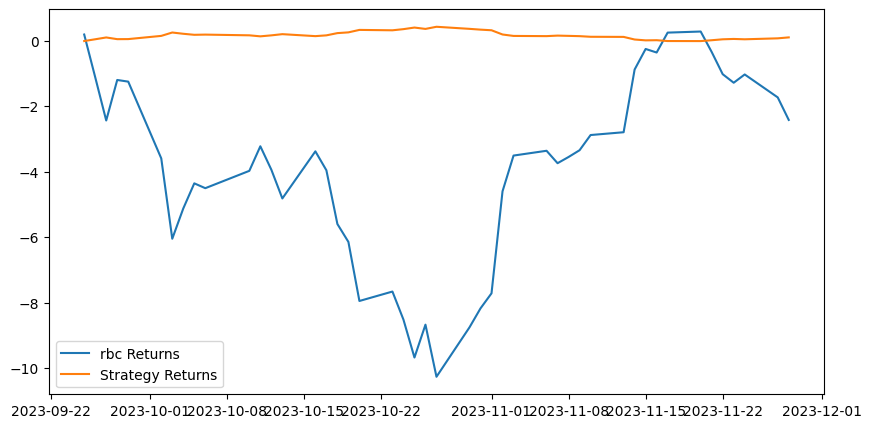

In [ ]:
plot_shart(cum_rbc_return, cum_strategy_return, symbol='rbc')

In [ ]:
print(sharpe_ratio(cum_strategy_return, cum_rbc_return))

-1.3933322282901275


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_train, ridge.predict(X_train)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_train, ridge.predict(X_train)))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, ridge.predict(X_test)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, ridge.predict(X_test)))

Mean squared error: 1.30
Variance score: 0.00
Mean squared error: 1.62
Variance score: 0.00


## LASSO VARIANT

In [ ]:
lasso_df=store_df

lasso_df, X, Y = create_regression_trading_condition(lasso_df)

X_train,X_test,Y_train,Y_test=create_train_split_group(X,Y,split_ratio=0.8)

In [ ]:
#!pip uninstall scikit-learn -y

#!pip install -U scikit-learn

In [ ]:
from sklearn import linear_model

# Fit the model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)

# The coefficients
print('Coefficients: \n', lasso.coef_)

Coefficients: 
 [-0.  0.]


In [ ]:
lasso_df['Predicted_Signal'] = lasso.predict(X)
lasso_df['rbc_Returns'] = np.log(
    lasso_df['Close'] / lasso_df['Close'].shift(1))

cum_rbc_return = calculate_return(
    lasso_df, split_value=len(X_train), symbol='rbc')
cum_strategy_return = calculate_strategy_return(
    lasso_df, split_value=len(X_train), symbol='rbc')

<ipython-input-35-e1d33d2cf9ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasso_df['Predicted_Signal'] = lasso.predict(X)
<ipython-input-35-e1d33d2cf9ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasso_df['rbc_Returns'] = np.log(
<ipython-input-13-14ffee8fddbe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

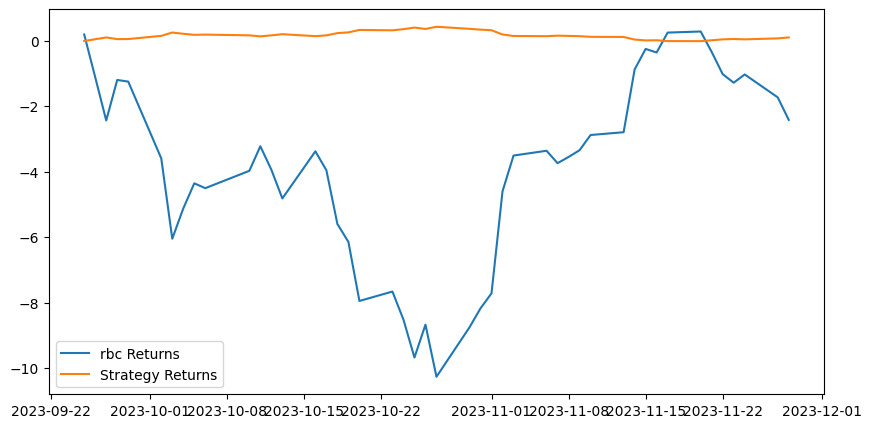

In [ ]:
plot_shart(cum_rbc_return, cum_strategy_return, symbol='rbc')

In [ ]:
print(sharpe_ratio(cum_strategy_return, cum_rbc_return))

-1.3928028277576714


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_train, lasso.predict(X_train)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_train, lasso.predict(X_train)))

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, lasso.predict(X_test)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, lasso.predict(X_test)))

Mean squared error: 1.30
Variance score: 0.00
Mean squared error: 1.62
Variance score: -0.00
